In [2]:
import numpy as np
import scipy as sp
import math as m
from prettytable import PrettyTable
import library as lib

## 1(a)

In [4]:
A = np.array([
    [   4,    2/3, -4/3,  4/3],
    [  2/3,    4,    0,    0 ],
    [ -4/3,    0,    6,    2 ],
    [  4/3,    0,    2,    6 ]
    ])

x0 = np.array([1, 1, 1, 1])

eigval, eigvec,steps =lib.power_method_find(A, x0)


print("Maximum Eigenvalue: ", np.round(eigval, 4))
print(f"Eigenvector{round(eigval)}: ", np.round(eigvec, 4))
print("Number of steps: ", steps)

Maximum Eigenvalue:  8.0
Eigenvector8:  [5.000e-04 2.000e-04 7.068e-01 7.074e-01]
Number of steps:  25


## 1(b)

## 2

In [5]:

data = lib.read_matrices("assign3fit.txt")
data = np.array(data[0])

xlist = data[:, 0]
ylist = data[:, 1]

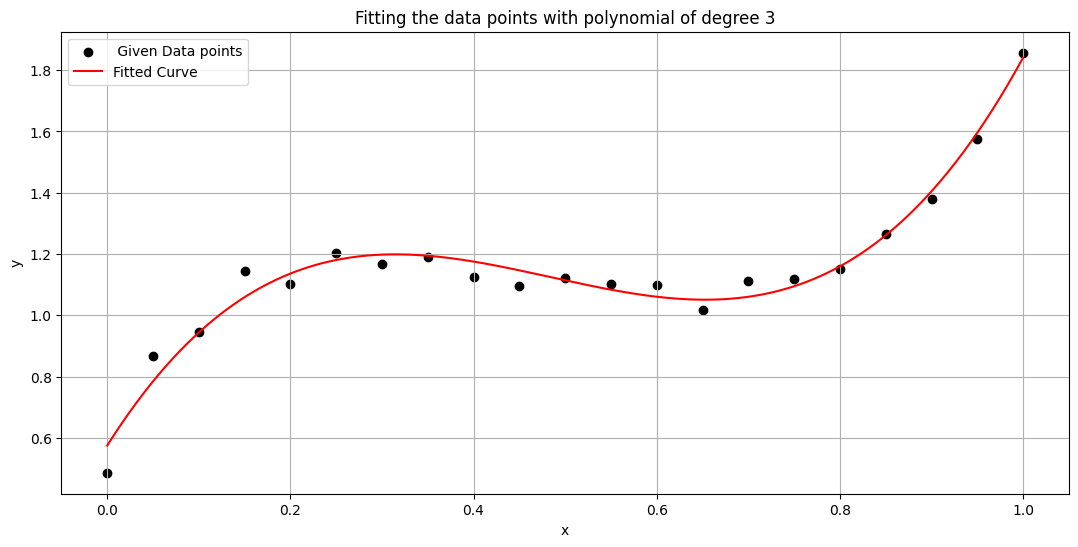

In [6]:

sigma = np.ones(len(xlist))
coeff_list = lib.polynomial_fit(xlist, ylist, sigma, 3)


def poly_fn(x,coefflist):
    sum = 0
    for i in range(len(coefflist)):
        sum += coefflist[i]*x**i
    return sum    


import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
plt.scatter(xlist, ylist, label=' Given Data points', color='black')

xlist_new = np.linspace(min(xlist), max(xlist), 1000)
ylist_new = poly_fn(xlist_new, coeff_list)

plt.plot(xlist_new, ylist_new, label='Fitted Curve', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting the data points with polynomial of degree 3')
plt.grid()
plt.legend()
plt.show()

### Fitting with Modified Chebyshev Polynomial

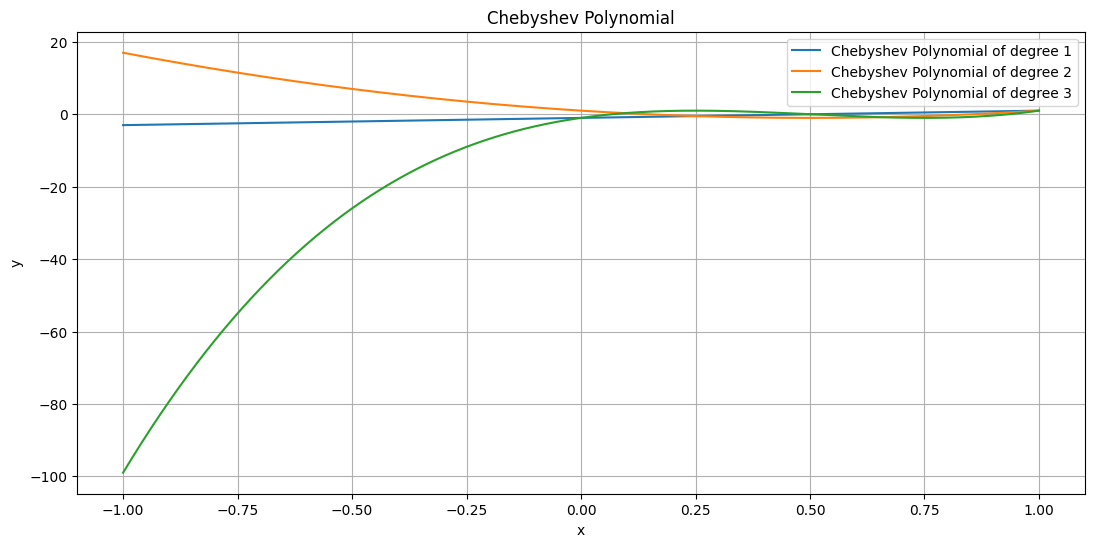

In [7]:

def chebyshev_polynomial(x,degree):
    if degree == 0:
        return 1
    elif degree == 1:
        return x
    else:
        return 2*x*chebyshev_polynomial(x,degree-1) - chebyshev_polynomial(x,degree-2)


def modified_chebyshev_polynomial(x,degree):
    return chebyshev_polynomial(2*x-1,degree)



def polynomial_fit(xlist: list,ylist: list,sigma_list: list,degree: int,tol=1e-6):

    def chebyshev_polynomial(x,degree):
        if degree == 0:
            return 1
        elif degree == 1:
            return x
        else:
            return 2*x*chebyshev_polynomial(x,degree-1) - chebyshev_polynomial(x,degree-2)


    def modified_chebyshev_polynomial(x,degree):
        return chebyshev_polynomial(2*x-1,degree)


    xlist = np.array(xlist)
    ylist = np.array(ylist)
    sigma_list = np.array(sigma_list)
    A_matrix = np.zeros((degree+1,degree+1))

    for i in range(degree+1):
        for j in range(degree+1):
            A_matrix[i][j] = np.sum((xlist**(i+j))/(sigma_list**2))
    B_matrix = np.zeros(degree+1)
    for i in range(degree+1):
        B_matrix[i] = np.sum((ylist*(xlist**i))/(sigma_list**2))
    a = np.linalg.solve(A_matrix,B_matrix)    
    return a




import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
x= np.linspace(-1,1,1000)
y = modified_chebyshev_polynomial(x,1)
plt.plot(x,y,label='Chebyshev Polynomial of degree 1')
y = modified_chebyshev_polynomial(x,2)
plt.plot(x,y,label='Chebyshev Polynomial of degree 2')
y = modified_chebyshev_polynomial(x,3)
plt.plot(x,y,label='Chebyshev Polynomial of degree 3')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Chebyshev Polynomial')
plt.grid()
plt.legend()
plt.show()    